# Assignment 8 - Pandas

### Due Thursday, June 10, 2021

Your assignment should be handed in as an iPython/Jupyter notebook checked into your private GitHub repository `CMSC6950_Assignments` with the filename `Assignment_8.ipynb`. 

In this assignment we will use pandas to examine earthquake data.

Start by importing pandas, numpy and matplotlib.

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

A dataset has be retrieved .csv format from the [USGS Earthquakes Database](https://earthquake.usgs.gov/earthquakes/search/). It is located at:

http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv

You don't even need to download it. You can open it directly with Pandas.

### 1) Use Pandas' read_csv function directly on this url to open it as a DataFrame
(Don't use any special options). Display the first few rows and the DataFrame info.

In [71]:
Earthquacks=pd.read_csv('http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv')
print(Earthquacks.info())
Earthquacks.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120108 entries, 0 to 120107
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   time       120108 non-null  object 
 1   latitude   120108 non-null  float64
 2   longitude  120108 non-null  float64
 3   depth      120107 non-null  float64
 4   mag        120065 non-null  float64
 5   magType    120065 non-null  object 
 6   nst        59688 non-null   float64
 7   gap        94935 non-null   float64
 8   dmin       85682 non-null   float64
 9   rms        119716 non-null  float64
 10  net        120108 non-null  object 
 11  id         120108 non-null  object 
 12  updated    120108 non-null  object 
 13  place      120108 non-null  object 
 14  type       120108 non-null  object 
dtypes: float64(8), object(7)
memory usage: 13.7+ MB
None


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.342000,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.043210,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake
5,2014-01-31 23:30:36.930,32.567667,-117.0135,0.01,1.51,ml,16.0,264.00,0.080810,0.2100,ci,ci11419722,2014-02-01T00:09:04.470Z,"3km N of Tijuana, Mexico",quarry blast
6,2014-01-31 23:28:04.020,33.359000,-116.3605,12.98,1.17,ml,26.0,163.00,0.032660,0.1200,ci,ci11419714,2014-02-01T00:54:07.630Z,"11km N of Borrego Springs, California",earthquake
7,2014-01-31 23:22:52.000,62.800200,-150.6965,86.40,1.50,ml,NaN,NaN,NaN,0.4700,ak,ak11151127,2014-01-31T23:33:23.190Z,"61km NNW of Talkeetna, Alaska",earthquake
8,2014-01-31 23:20:42.000,58.169500,-151.9924,50.10,2.10,ml,NaN,NaN,NaN,0.3700,ak,ak11151125,2014-01-31T23:25:57.118Z,"48km NNE of Kodiak, Alaska",earthquake
9,2014-01-31 23:17:34.300,37.686000,-121.7287,4.20,1.60,Md,NaN,111.60,0.062882,0.0700,nc,nc72153361,2014-02-11T22:43:08.085Z,"3km E of Livermore, California",earthquake


You should have seen that the dates were not automatically parsed into datetime 

---

types.

### 2) Re-read the data in such a way that all date columns are identified as dates and the earthquake id is used as the index

Verify that this worked using the `head` and `info` functions.


In [81]:
Earthquacks=pd.read_csv('http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv',parse_dates=['time'],index_col='id')
print(Earthquacks.info())
Earthquacks.head(10)


<class 'pandas.core.frame.DataFrame'>
Index: 120108 entries, ak11155107 to ak11453389
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   time       120108 non-null  datetime64[ns]
 1   latitude   120108 non-null  float64       
 2   longitude  120108 non-null  float64       
 3   depth      120107 non-null  float64       
 4   mag        120065 non-null  float64       
 5   magType    120065 non-null  object        
 6   nst        59688 non-null   float64       
 7   gap        94935 non-null   float64       
 8   dmin       85682 non-null   float64       
 9   rms        119716 non-null  float64       
 10  net        120108 non-null  object        
 11  updated    120108 non-null  object        
 12  place      120108 non-null  object        
 13  type       120108 non-null  object        
dtypes: datetime64[ns](1), float64(8), object(5)
memory usage: 13.7+ MB
None


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.342000,0.0247,nn,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.043210,0.2000,ci,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake
ci11419722,2014-01-31 23:30:36.930,32.567667,-117.0135,0.01,1.51,ml,16.0,264.00,0.080810,0.2100,ci,2014-02-01T00:09:04.470Z,"3km N of Tijuana, Mexico",quarry blast
ci11419714,2014-01-31 23:28:04.020,33.359000,-116.3605,12.98,1.17,ml,26.0,163.00,0.032660,0.1200,ci,2014-02-01T00:54:07.630Z,"11km N of Borrego Springs, California",earthquake
ak11151127,2014-01-31 23:22:52.000,62.800200,-150.6965,86.40,1.50,ml,NaN,NaN,NaN,0.4700,ak,2014-01-31T23:33:23.190Z,"61km NNW of Talkeetna, Alaska",earthquake
ak11151125,2014-01-31 23:20:42.000,58.169500,-151.9924,50.10,2.10,ml,NaN,NaN,NaN,0.3700,ak,2014-01-31T23:25:57.118Z,"48km NNE of Kodiak, Alaska",earthquake


### 3) Use `describe` to get the basic statistics of all the columns

Note the highest and lowest magnitude of earthquakes in the databse.

In [80]:
Earthquacks.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms
count,120108.000000,120108.000000,120107.000000,120065.000000,59688.000000,94935.000000,85682.000000,119716.000000
mean,38.399579,-99.961402,28.375029,1.793958,17.878284,124.048978,0.893198,0.358174
std,21.938258,82.996858,62.215416,1.343466,14.911369,68.518595,2.903966,0.364046
min,-73.462000,-179.998900,-9.900000,-0.970000,0.000000,9.000000,0.000000,0.000000
25%,34.228917,-147.742025,4.100000,0.820000,8.000000,74.000000,0.020760,0.070000
50%,38.805300,-120.832000,9.200000,1.400000,14.000000,107.000000,0.073670,0.200000
75%,53.889500,-116.068100,22.880000,2.400000,22.000000,155.000000,0.447000,0.590000
max,86.651400,179.998000,697.360000,8.200000,365.000000,356.400000,64.498000,8.460000


### 4) Use `sort_values` to get the top 20 earthquakes by magnitude

In [82]:
Earthquacks.sort_values('mag',ascending=False).head(20)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
usc000nzvd,2014-04-01 23:46:47.260,-19.6097,-70.7691,25.00,8.2,mww,NaN,23.0,0.609,0.66,us,2015-07-30T16:24:51.223Z,"94km NW of Iquique, Chile",earthquake
usc000rki5,2014-06-23 20:53:09.700,51.8486,178.7352,109.00,7.9,mww,NaN,22.0,0.133,0.71,us,2015-04-18T21:54:08.699Z,"19km SE of Little Sitkin Island, Alaska",earthquake
usc000p27i,2014-04-03 02:43:13.110,-20.5709,-70.4931,22.40,7.7,mww,NaN,44.0,1.029,0.82,us,2015-06-06T07:31:05.755Z,"53km SW of Iquique, Chile",earthquake
usc000phx5,2014-04-12 20:14:39.300,-11.2701,162.1481,22.56,7.6,mww,NaN,13.0,2.828,0.71,us,2015-04-18T21:54:27.398Z,"93km SSE of Kirakira, Solomon Islands",earthquake
usb000pr89,2014-04-19 13:28:00.810,-6.7547,155.0241,43.37,7.5,mww,NaN,16.0,3.820,1.25,us,2015-04-18T21:54:18.633Z,"70km SW of Panguna, Papua New Guinea",earthquake
usc000piqj,2014-04-13 12:36:19.230,-11.4633,162.0511,39.00,7.4,mww,NaN,17.0,2.885,1.00,us,2015-08-13T19:29:13.018Z,"112km S of Kirakira, Solomon Islands",earthquake
usb000slwn,2014-10-14 03:51:34.460,12.5262,-88.1225,40.00,7.3,mww,NaN,18.0,1.078,0.70,us,2015-08-13T19:35:02.679Z,"74km S of Intipuca, El Salvador",earthquake
usb000pq41,2014-04-18 14:27:24.920,17.3970,-100.9723,24.00,7.2,mww,NaN,46.0,2.250,1.20,us,2015-08-13T19:30:39.599Z,"33km ESE of Petatlan, Mexico",earthquake
usc000pft9,2014-04-11 07:07:23.130,-6.5858,155.0485,60.53,7.1,mww,NaN,21.0,3.729,0.88,us,2014-07-01T02:37:56.000Z,"56km WSW of Panguna, Papua New Guinea",earthquake


Examine the structure of the `place` column. The country information seems to be in there. How would you get it out?

### 5) Extract the country using Pandas [text data functions](https://pandas.pydata.org/pandas-docs/stable/text.html)

Add it as a new column to the dataframe. (Is it really just country? No, some rows have the name of a US state.)

In [83]:
Earthquacks['Country']=Earthquacks['place'].str.extract('(\,[a-zA-Z ]+)', expand=False).str.strip()
Earthquacks['Country']=Earthquacks['Country'].str.replace(', ','')

In [37]:
Earthquacks.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,Country
id,,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake,Alaska
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake,Nevada
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake,Alaska
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake,Alaska
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake,Mexico


In [84]:
Earthquacks.type.unique()

array(['earthquake', 'quarry blast', 'quarry', 'mining explosion',
       'rock burst', 'explosion', 'landslide', 'sonicboom', 'sonic boom',
       'anthropogenic event', 'acoustic noise'], dtype=object)

### 6) Find the 10 states / countries with the highest _number_ of earthquakes

In [39]:
country_grp=Earthquacks.groupby(['Country'])
country_high_Eq=country_grp['type'].apply(lambda x: x.str.contains('earthquake').sum())
country_high_Eq.sort_values(ascending=False).head(10)

Country
California     43774
Alaska         33589
Oregon          3014
Nevada          2842
Hawaii          2564
Washington      2486
Puerto Rico     2284
Indonesia       2120
Oklahoma        1992
Montana         1991
Name: type, dtype: int64








































































### 7) Find the top 10 states / countries where the strongest and weakest earthquakes occured

In [86]:


Earthquacks.groupby('Country')['mag'].max().sort_values(ascending=False).head(15)


Country
Chile                8.2
Alaska               7.9
Solomon Islands      7.6
Papua New Guinea     7.5
El Salvador          7.3
Mexico               7.2
Fiji                 7.1
Indonesia            7.1
Greece               6.9
China                6.9
,                    6.9
New Zealand          6.9
California           6.8
Peru                 6.8
Wallis and Futuna    6.7
Name: mag, dtype: float64

In [41]:
Earthquacks.groupby('Country')['mag'].max().sort_values(ascending=True).head(10)

Country
Sierra Leone     0.00
Vermont          1.00
Rhode Island     1.71
New Jersey       1.92
Maine            2.00
Pennsylvania     2.18
CA               2.20
Illinois         2.30
New Hampshire    2.40
Massachusetts    2.40
Name: mag, dtype: float64

It looks like US states are being treated differently from foreign countries. We would like to fix that.

How can we tell if a name is a US state name? Python has a package for that: https://pypi.python.org/pypi/us!

This is a good time to try installing a new package using `pip`. Pip is the original python package manager that predates `conda`. Basically `conda` is more oriented towards data science while `pip` is more general purpose. There are lots more packages on `pip` than on `conda`. You can read a [comparision](https://www.quora.com/What-is-the-comparison-among-conda-vs-pip-vs-anaconda) of these two utilities if you want to know more.

### 8) Install the `us` package using pip, either directly from the notebook or the command line

The shell command is `pip install us`.

In [87]:
!pip install us

### 9) Import the `us` package to verify your installation works

In [88]:
import us

### 10) Read the [`us` documentation](https://pypi.python.org/pypi/us) to figure out how to create a list of state names (all upper case)

In [91]:
state_names=[state.name.upper() for state in us.states.STATES]
state_names

['ALABAMA',
 'ALASKA',
 'ARIZONA',
 'ARKANSAS',
 'CALIFORNIA',
 'COLORADO',
 'CONNECTICUT',
 'DELAWARE',
 'FLORIDA',
 'GEORGIA',
 'HAWAII',
 'IDAHO',
 'ILLINOIS',
 'INDIANA',
 'IOWA',
 'KANSAS',
 'KENTUCKY',
 'LOUISIANA',
 'MAINE',
 'MARYLAND',
 'MASSACHUSETTS',
 'MICHIGAN',
 'MINNESOTA',
 'MISSISSIPPI',
 'MISSOURI',
 'MONTANA',
 'NEBRASKA',
 'NEVADA',
 'NEW HAMPSHIRE',
 'NEW JERSEY',
 'NEW MEXICO',
 'NEW YORK',
 'NORTH CAROLINA',
 'NORTH DAKOTA',
 'OHIO',
 'OKLAHOMA',
 'OREGON',
 'PENNSYLVANIA',
 'RHODE ISLAND',
 'SOUTH CAROLINA',
 'SOUTH DAKOTA',
 'TENNESSEE',
 'TEXAS',
 'UTAH',
 'VERMONT',
 'VIRGINIA',
 'WASHINGTON',
 'WEST VIRGINIA',
 'WISCONSIN',
 'WYOMING']

### 11) Write a function to check whether a string is a US state name.
This function should not be case sensitive. It should also strip any whitespace out of the test string.

In [92]:
def check_state(state):
   
    state=state.strip()
    state=state.upper()
    if state in state_names:
        return True
    else:
       return False     
       

In [46]:
check_state('AlaBama')

True

### 12) Use Pandas' [apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html) function to apply this to each row of the country name series

You should produce a new boolean series. (Hint: use `dropna()` to drop rows that have null values before calling apply.)

In [47]:
Earthquacks.dropna(subset=['Country'])
Earthquacks = Earthquacks[Earthquacks['Country'].notna()]

Earthquacks['is_state'] = Earthquacks['Country'].apply(check_state)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [48]:
Earthquacks

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,Country,is_state
id,,,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.708100,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake,Alaska,True
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.130900,0.00,1.33,ml,4.0,171.43,0.342000,0.0247,nn,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake,Nevada,True
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.252800,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake,Alaska,True
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.957500,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake,Alaska,True
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.692500,10.59,1.34,ml,6.0,285.00,0.043210,0.2000,ci,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake,Mexico,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ak11453391,2014-12-01 00:10:16.000,60.963900,-146.762900,14.80,3.80,ml,NaN,NaN,NaN,0.6900,ak,2015-03-24T18:25:07.628Z,"29km SW of Valdez, Alaska",earthquake,Alaska,True
ak11453395,2014-12-01 00:09:39.000,58.869100,-154.415900,108.40,2.40,ml,NaN,NaN,NaN,0.6700,ak,2014-12-10T01:04:25.209Z,"102km SSE of Old Iliamna, Alaska",earthquake,Alaska,True
nc72358451,2014-12-01 00:09:25.350,38.843498,-122.825836,2.37,0.43,md,8.0,107.00,0.008991,0.0300,nc,2014-12-01T01:15:02.814Z,"9km WNW of Cobb, California",earthquake,California,True


### 13) reindex this boolean series to match the dataframe's index
Fill the null values with `False` using `.fillna()`.

In [49]:
Earthquacks['is_state'].fillna('False',inplace=True)
Earthquacks.reindex()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,Country,is_state
id,,,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.708100,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake,Alaska,True
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.130900,0.00,1.33,ml,4.0,171.43,0.342000,0.0247,nn,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake,Nevada,True
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.252800,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake,Alaska,True
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.957500,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake,Alaska,True
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.692500,10.59,1.34,ml,6.0,285.00,0.043210,0.2000,ci,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake,Mexico,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ak11453391,2014-12-01 00:10:16.000,60.963900,-146.762900,14.80,3.80,ml,NaN,NaN,NaN,0.6900,ak,2015-03-24T18:25:07.628Z,"29km SW of Valdez, Alaska",earthquake,Alaska,True
ak11453395,2014-12-01 00:09:39.000,58.869100,-154.415900,108.40,2.40,ml,NaN,NaN,NaN,0.6700,ak,2014-12-10T01:04:25.209Z,"102km SSE of Old Iliamna, Alaska",earthquake,Alaska,True
nc72358451,2014-12-01 00:09:25.350,38.843498,-122.825836,2.37,0.43,md,8.0,107.00,0.008991,0.0300,nc,2014-12-01T01:15:02.814Z,"9km WNW of Cobb, California",earthquake,California,True


In [50]:
Earthquacks.is_state.unique()


array([ True, False])

### 14) Now re-assign the country column in the DataFrame to `USA` if the row is a state.
Also add the state name as a new column.

In [51]:
filter_state=Earthquacks['is_state']==True
Earthquacks.loc[filter_state,'Country']='USA'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [52]:
Earthquacks.Country.unique()

array(['USA', 'Mexico', 'Papua New Guinea', 'New Zealand',
       'British Virgin Islands', 'Canada', 'Fiji', 'Antarctica', 'Chile',
       'Indonesia', 'Solomon Islands', 'Micronesia', 'Russia',
       'Philippines', 'Bolivia', 'Greece', 'Japan', 'Puerto Rico', 'Iran',
       'Tonga', 'Wallis and Futuna', 'Guam', 'CA', 'Pakistan', 'Burma',
       'China', 'Peru', 'Costa Rica', 'East Timor', 'Japan region',
       'Northern Mariana Islands', 'El Salvador', 'Samoa', 'Taiwan',
       'South Sandwich Islands', 'Colombia', 'Dominican Republic',
       'Argentina', 'Saint Helena', 'Tanzania', 'Vanuatu',
       'Bosnia and Herzegovina', 'India', 'American Samoa', 'Serbia',
       'Nicaragua', 'Republic of the Congo', 'U', ',', 'Guatemala',
       'Kyrgyzstan', 'Afghanistan', 'New Caledonia', 'Saudi Arabia',
       'Nunoa', 'Romania', 'Italy', 'Panama', 'Albania', 'Haiti',
       'Ecuador', 'Tajikistan', 'Venezuela', 'Hungary',
       'Christmas Island', 'Bouvet Island', 'Eritrea', 'Turkmenis

### 15) Now redo the country count and minimum magnitdue using the corrected 

1.   List item
2.   List item

data

In [53]:
country_grp=Earthquacks.groupby(['Country'])
country_high_Eq=country_grp['type'].apply(lambda x: x.str.contains('earthquake').sum())
country_high_Eq.sort_values(ascending=False).head(10)


Country
USA                 95497
Puerto Rico          2284
Indonesia            2120
Papua New Guinea     1356
Chile                1191
Japan                1150
New Zealand           762
Philippines           749
Mexico                667
Fiji                  666
Name: type, dtype: int64

In [54]:
Earthquacks.groupby('Country')['mag'].max().sort_values(ascending=True).head(10)

Country
Sierra Leone        0.0
CA                  2.2
Aleutian Islands    2.6
Jamaica             3.3
Saint Martin        3.3
Germany             3.6
Bonaire             3.6
Czech Republic      3.8
Leeward Islands     3.8
U                   3.9
Name: mag, dtype: float64

### 16) Create a filtered dataset that only has earthquakes of magnitude 4 or larger

In [55]:
Mag_filter=Earthquacks['mag'] >= 4.0
Filtered_Mag_dataset=Earthquacks[Mag_filter]


### 17) Analyze the distribution of the Earthquake magnitudes in the filtered distribution

Make a histogram of the Earthquake count versus magnitude. Make sure to use a Logarithmic scale. What sort of relationship do you see?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f458b564490>]],
      dtype=object)

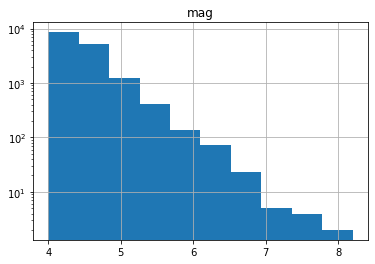

In [56]:
Filtered_Mag_dataset.hist(column='mag',log=True)

The histogram shows that the distribution of Earthquacks with mag 4.0 is much, however, by increasing the mag the distribution is decreasing

### 18) Visualize the locations of earthquakes by making a scatterplot of their latitude and longitude.

Use the filtered data. Color it by magnitude. Make it pretty

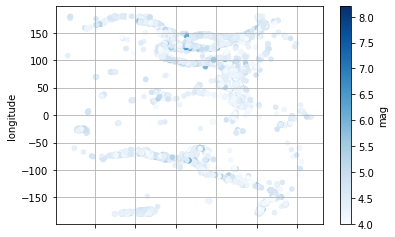

In [57]:
Filtered_Mag_dataset.plot(kind='scatter', x='latitude',y='longitude', grid=True,c='mag',colormap='Blues')

### 19) Do the same for depth

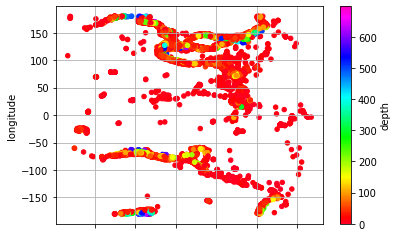

In [58]:
Filtered_Mag_dataset.plot(kind='scatter', x='latitude',y='longitude', grid=True,c='depth',colormap='gist_rainbow')